# MNIST
This notebook shows sample-based explanations for individual test predictions for a tree ensemble trained on two or more classes in the MNIST dataset.

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')

from scripts import mnist

### 4s and 9s
We filter the train and test sets of MNIST to images containing either the label 4 or 9. We then train an LGB model on this two-class dataset and randomly choose a test instance to predict and explain.

train instances: 11791
test instances: 1991
labels: [4, 9]
reducing features from 784 to 50 using PCA...
fitting lgb model...
fitting tree explainer...
C=0.01: 10.417s; corr=0.992
C=0.1: 10.545s; corr=1.000
C=1.0: 12.136s; corr=0.998
C=10.0: 7.888s; corr=0.995
C=100.0: 10.452s; corr=0.993
train set acc: 0.999830
train log loss: 0.02058
train auroc: 1.000
test set acc: 0.977901
test log loss: 0.06404
test auroc: 0.998


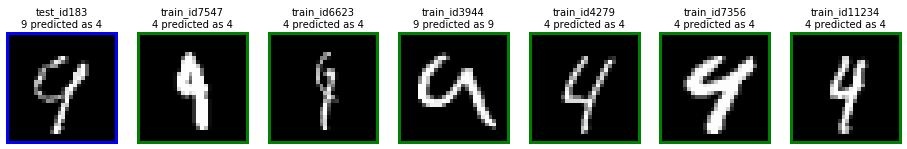

In [4]:
args = mnist.Args()
args.dataset='mnist_49'            # Dataset to use.
args.tree_type='lgb'               # cb, lgb, or xgb
args.tree_kernel='leaf_output'     # leaf_output, leaf_path, or feature_path
args.kernel_model='lr'             # lr or svm
args.true_label=False              # Train on true or predicted labels
args.topk_train=3                  # No. train instances to show
args.data_dir='../../data/'        # Dataset directory
args.true_label=True               # Train on true labels
mnist.main(args)

The training samples shown (green border) are samples that contribute the *most* towards the *incorrect* prediction of the test instance (blue border). The first two training samples (directly right of the test instance) are both 4's that could be miscontrued as 9s. The next sample is a 9 that takes on 4-like quaities, and the last three training samples are all 4s that look similar to the test instance. One actionable item may be to remove the potentially noisy training samples that TREX has found; or possibly remove the ambiguous looking test instance, or both. However, one may wish to keep these samples depending on the type of research they are doing.